### Identify whether students have different scoring abilities across different subjects using ANOVA

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
stud_df = pd.read_excel('F:/GreyCampus-Datascience/DS5/Statistics/Week5-Project-mod.xlsx')
stud_df

,Students,SCORE,SUBJECT
0,1,81,Maths
1,2,30,Maths
2,3,60,Maths
3,4,42,Maths
4,5,47,Maths
5,6,37,Maths
6,7,80,Maths
7,8,96,Maths
8,9,72,Maths
9,10,79,Maths


<AxesSubplot:title={'center':'SCORE'}, xlabel='SUBJECT'>

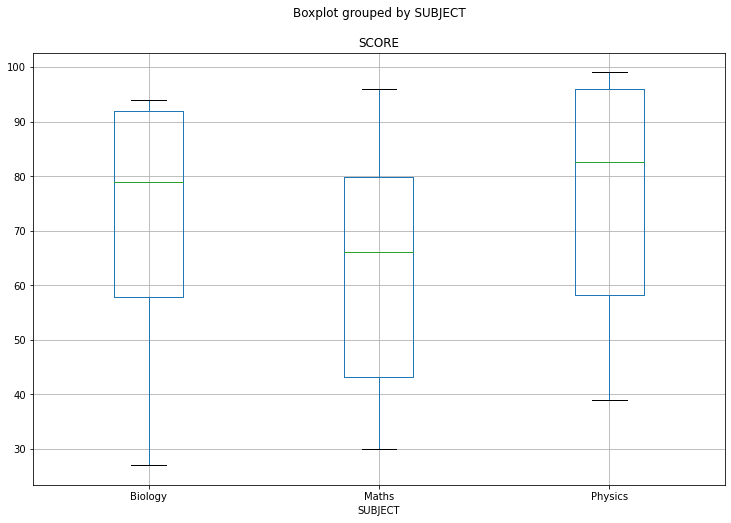

In [18]:
# Use a box plot to help visualize the differnt groups

stud_df.boxplot('SCORE', by= 'SUBJECT', figsize= (12,8))

### Perform ANOVA test to compare the scoring abilities of the students in different subjects:
Let us assume that the students have the same scoring ability in different subjects.

Null Hypothesis: Students have the same scoring ability in different subjects (Means of all subjects is same)

Alternate Hypothesis: Students have different scoring abilities in different subjects (Means of all subjects is different)

### ANOVA USING PINGOUIN

In [9]:
import pingouin as pg

aov = pg.anova(data=stud_df, dv = 'SCORE', between = ['SUBJECT'], detailed = True).round(3)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,SUBJECT,948.867,2,474.433,0.828,0.448,0.058
1,Within,15463.800,27,572.733,NaN,NaN,NaN


#### Since the P-value is greater than 0.05, we accept the null hypothesis.

#### Hence, we can conclude that Students have the SAME Scoring Ability in different subjects.

### Carry out paired t-tests as part of Post-hoc analysis

In [36]:
pt = pg.pairwise_tukey(dv='SCORE', between='SUBJECT', data=stud_df)
print(pt)

         A        B  mean(A)  mean(B)  diff         se         T   p-tukey  \
0  Biology    Maths     70.5     62.4   8.1  10.702648  0.756822  0.718217   
1  Biology  Physics     70.5     76.1  -5.6  10.702648 -0.523235  0.851523   
2    Maths  Physics     62.4     76.1 -13.7  10.702648 -1.280057  0.419866   

     hedges  
0  0.324160  
1 -0.224111  
2 -0.548271  


#### Looking at the p-values, we can conclude that students have all the the same scoring ability in all the different subject pairs. 

### ALTERNATE METHOD USING STATSMODELS

In [32]:
# Set up the ANOVA model

mod = ols('SCORE ~ SUBJECT', data= stud_df).fit()
mod

In [34]:
# Carry out ANOVA using anova_lm

anv_tab = sm.stats.anova_lm(mod, typ=2).round(3)
print(anv_tab)

             sum_sq    df      F  PR(>F)
SUBJECT     948.867   2.0  0.828   0.448
Residual  15463.800  27.0    NaN     NaN


#### Results are same as observed above.

### Carry out paired t-tests as part of Post-hoc analysis

In [35]:
pair_t = mod.t_test_pairwise('SUBJECT')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Maths-Biology,-8.1,10.702648,-0.756822,0.455710,-30.060019,13.860019,0.703749,False
Physics-Biology,5.6,10.702648,0.523235,0.605079,-16.360019,27.560019,0.703749,False
Physics-Maths,13.7,10.702648,1.280057,0.211414,-8.260019,35.660019,0.509604,False


#### Looking at the p-values, we can conclude that students have all the the same scoring ability in all the different subject pairs. 